In [1]:
run compute_sides_colf.py

/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
 LF_array, logLmean, Jupperlist, zcenlist, ref_2compare = pickle.load(open('LFarr_SIDES.p','rb'))

In [4]:
print(Jupperlist)
print(zcenlist)
print(ref_2compare)

[1, 2, 3, 4, 3, 4, 5, 6, 7, 8, 1]
[0.27, 1.4, 2.56, 3.73, 0.49, 0.95, 1.43, 1.91, 2.39, 2.87, 2.4]
['ASPECS3mm', 'ASPECS3mm', 'ASPECS3mm', 'ASPECS3mm', 'ASPECS1mm', 'ASPECS1mm', 'ASPECS1mm', 'ASPECS1mm', 'ASPECS1mm', 'ASPECS1mm', 'ColdZ']


In [5]:
#Plot the CO(1-0) of Riechers et al. 2018
Lprim_R18 = 10.**np.array([ [9.5, 10], [10, 10.5], [10.5, 11], [11., 11.5] ])
LF_R18 = 10.**np.array([ [-4.04, -2.21], [-4.10, -3.32], [-3.98, -3.60] , [-6.28, -4.45] ])

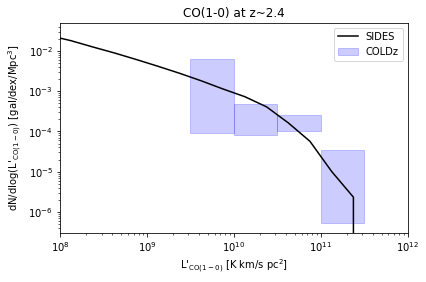

In [6]:
k = 10

SIDES, = plt.plot(10.**logLmean, LF_array[:,k], 'k')
sline = 'CO({}-{})'.format(Jupperlist[k], Jupperlist[k]-1)
plt.xlabel(r"L'$_{\rm "+sline+"}$ [K km/s pc$^2$]")
plt.ylabel(r"dN/dlog(L'$_{\rm "+sline+"}$) [gal/dex/Mpc$^3$]")
plt.xlim((1.e8,1.e12))
plt.xscale('log')
plt.yscale('log')


for l in range(0, np.size(Lprim_R18[:,0])):
    R18, = plt.fill([Lprim_R18[l,0], Lprim_R18[l,0], Lprim_R18[l,1], Lprim_R18[l,1]],
                        [LF_R18[l,0], LF_R18[l,1],
                         LF_R18[l,1], LF_R18[l,0]],
                         'b', alpha = 0.2, edgecolor = 'b')
plt.title('CO({}-{})'.format(Jupperlist[k], Jupperlist[k]-1)+' at z~{}'.format(zcenlist[k]))

plt.legend([SIDES, R18], ['SIDES', 'COLDz'])
    
plt.tight_layout(pad=1.0, h_pad=None, w_pad=None, rect=None)
plt.savefig('LFCO_COLDz_SIDES.pdf', dpi = 150)
plt.show()

In [7]:
#Load ASPECS pilot data

#band 3 data first and then band 6

#band 3: CO21@z=1.43, CO32@z=2.61, CO43@z=3.8
#band 6: CO32 @ z=0.49, CO43@z=0.95, CO5-4@z=1.43
Lprim_D16 = 10.**np.array([[9.5,10.5], [9.5,10.5] , [9.5, np.nan],
                      [9.,np.nan] ,[9.,10.] , [9., np.nan]])
LF_D16_low = 10.**np.array([[-3.18,-4.059], [-3.393,-4.248], [-3.72, np.nan],
                      [-2.977,np.nan], [-3.418, -4.547], [-3.887, np.nan]])
LF_D16_high = 10.**np.array([[-2.498, -2.771], [-2.724, -3.004], [-2.914, np.nan],
                            [-1.846, np.nan], [-2.316, -2.695] ,[-2.537, np.nan]])
Lprim_uplim_D16 = 10.**np.array([11.5, 11.5, 10.5, 10., 11., 10.])
Uplim_D16 = 10.**np.array([-3.022, -3.265, -3.336, -2.235, -2.751, -2.935])

In [8]:
#Load ASPECS band 3
#first column: logL
#next columns: 7 column per transition (-3 sigma, -2, -1, 0, +1, +2, +3)
# for 10, 21, 32, and 43 transition (z = 0.27, 1.4, 2.56, 3.73)

LF3mm_data = np.loadtxt('ASPECS/co_lf_lp_3mm.out')
#LF3mm_data = LF3mm_data[0:9,:]
np.shape(LF3mm_data)
Llim_3mm = [np.nan,9.4,9.6,9.6]

In [9]:
LF3mm_data[:,0]

array([ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ,  8.1,  8.6,
        9.1,  9.6, 10.1, 10.6, 11.1, 11.6, 12.1,  8.2,  8.7,  9.2,  9.7,
       10.2, 10.7, 11.2, 11.7, 12.2,  8.3,  8.8,  9.3,  9.8, 10.3, 10.8,
       11.3, 11.8, 12.3,  8.4,  8.9,  9.4,  9.9, 10.4, 10.9, 11.4, 11.9,
       12.4])

In [10]:
# 32, 43, 54, 65
LFmidJ_data = np.loadtxt('ASPECS/co_lf_lp_midJ.out')
#LFmidJ_data = LFmidJ_data[0:9,:]
np.shape(LFmidJ_data)
Llim_midJ = np.log10(np.array([1.71,4.299,6.174,7.384])*1.e8)

In [11]:
#76, 87, 98 109 1110
LFhighJ_data = np.loadtxt('ASPECS/co_lf_lp_highJ.out')
#LFhighJ_data = LFhighJ_data[0:9,:]
np.shape(LFhighJ_data)
Llim_highJ = np.log10(np.array([8.088,8.464,8.712,8.696])*1.e8)

In [12]:
#Walter et al. 2014

z_w14 = [1.52,2.75]
Jup_w14 = [2,3]
lprim_low_w14 = np.array([5.2,6.6])*1.e9
phi_low_w14 = np.array([0.69,0.41])*1.e-3
phi_high_w14 = np.array([2.10,3.28])*1.e-3

[ 3  4  5 12 13 21 22 30 31 39 40]
[ 4  5 13 14 21 22 30 31 39 40]
[ 4 13 21 22 30 31 39]
[ 1  2 10 19 28 37]
[ 2  3 11 12 20 29 37 38]
[ 3 11 12 20 21 29 38]
[ 3 12 20 21 29 30 38]
[ 3 12 20 21 29 38]
[ 3 12 20 21 29 30 38]


/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


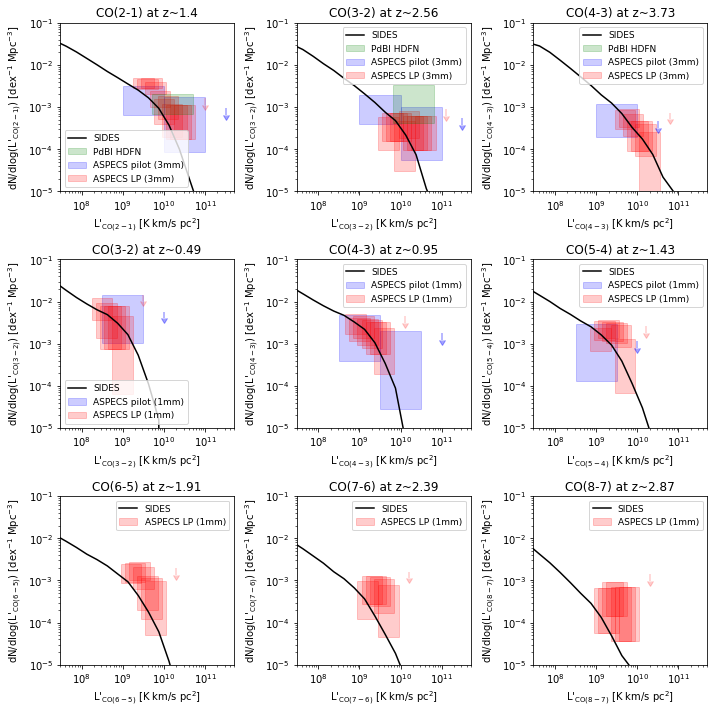

In [13]:
f, axarr = plt.subplots(3,3,figsize = (10,10))

k_pilot = [0,1,2,3,4,5,-1,-1,-1]

for k in range(0, 9):
    i = k % 3
    j = int(k / 3)
    SIDES, = axarr[j,i].plot(10.**logLmean, LF_array[:,k+1], 'k')
    sline = 'CO({}-{})'.format(Jupperlist[k+1], Jupperlist[k+1]-1)
    axarr[j,i].set_xlabel(r"L'$_{\rm "+sline+"}$ [K km/s pc$^2$]")
    axarr[j,i].set_ylabel(r"dN/dlog(L'$_{\rm "+sline+"}$) [dex$^{-1}$ Mpc$^{-3}$]")
    axarr[j,i].set_xlim((3.e7,5.e11))
    axarr[j,i].set_ylim((1.e-5,0.1))
    axarr[j,i].set_xscale('log')
    axarr[j,i].set_yscale('log')
    axarr[j,i].set_title('CO({}-{})'.format(Jupperlist[k+1], Jupperlist[k+1]-1)+' at z~{}'.format(zcenlist[k+1]))

    if k_pilot[k] >= 0:
        for l in range(0,2):
            D16, = axarr[j,i].fill(Lprim_D16[k_pilot[k],l]*10**np.array([-0.5,0.5,0.5,-0.5]),
                                    [LF_D16_high[k_pilot[k],l], LF_D16_high[k_pilot[k],l],
                                    LF_D16_low[k_pilot[k],l], LF_D16_low[k_pilot[k],l]],
                                    'b', alpha = 0.2, edgecolor = 'b')
            axarr[j,i].errorbar(Lprim_uplim_D16[k_pilot[k]], Uplim_D16[k_pilot[k]],
                                yerr = 0.3*Uplim_D16[k_pilot[k]], uplims = True,
                                color = 'b', alpha = 0.2)
    #plot 3mm data!
    if k <3:
        mean_col = 4 + 7*(k+1)
        good2plot = np.where((LF3mm_data[:,mean_col] > -12) & (LF3mm_data[:,0] > Llim_3mm[k+1]))
        good2plot = good2plot[0]
        print(good2plot)
        for l in range(0, len(good2plot)):
            D19, = axarr[j,i].fill(10.**(LF3mm_data[good2plot[l],0]+np.array([-0.25,0.25,0.25,-0.25])),
                                    10.**np.array([LF3mm_data[good2plot[l],mean_col+1],LF3mm_data[good2plot[l],mean_col+1],
                                    LF3mm_data[good2plot[l],mean_col-1],LF3mm_data[good2plot[l],mean_col-1]]),
                                    'r', alpha = 0.2, edgecolor = 'r', label = 'ASPECS LP')
        upindex = np.where(LF3mm_data[:,0] == np.max(LF3mm_data[good2plot,0])+0.5)
        uplim = 10.**LF3mm_data[upindex,mean_col+3]
        axarr[j,i].errorbar(10.**LF3mm_data[upindex,0], uplim,
                            yerr = 0.3*uplim, uplims = True,
                            color = 'r', alpha = 0.2)
        
        
   #plot midJ data!
    if k >=3 and k<7:
        mean_col = 4 + 7*(k-3)
        good2plot = np.where((LFmidJ_data[:,mean_col] > -12) & (LFmidJ_data[:,0]-0.25 > Llim_midJ[k-3]))
        good2plot = good2plot[0]
        print(good2plot)
        for l in range(0, len(good2plot)):
            D20, = axarr[j,i].fill(10.**(LFmidJ_data[good2plot[l],0]+np.array([-0.25,0.25,0.25,-0.25])),
                                    10.**np.array([LFmidJ_data[good2plot[l],mean_col+1],LFmidJ_data[good2plot[l],mean_col+1],
                                    LFmidJ_data[good2plot[l],mean_col-1],LFmidJ_data[good2plot[l],mean_col-1]]),
                                    'r', alpha = 0.2, edgecolor = 'r', label = 'ASPECS LP')
        upindex = np.where(LFmidJ_data[:,0] == np.max(LFmidJ_data[good2plot,0])+0.5)
        uplim = 10.**LFmidJ_data[upindex,mean_col+3]
        axarr[j,i].errorbar(10.**LFmidJ_data[upindex,0], uplim,
                            yerr = 0.3*uplim, uplims = True,
                            color = 'r', alpha = 0.2)
        
        
    #plot highJ data!
    if k>=7:
        mean_col = 4 + 7*(k-7)
        good2plot = np.where((LFhighJ_data[:,mean_col] > -12) & (LFhighJ_data[:,0]-0.25 > Llim_highJ[k-7]))
        good2plot = good2plot[0]
        print(good2plot)
        for l in range(0, len(good2plot)):
            D20, = axarr[j,i].fill(10.**(LFhighJ_data[good2plot[l],0]+np.array([-0.25,0.25,0.25,-0.25])),
                                    10.**np.array([LFhighJ_data[good2plot[l],mean_col+1],LFhighJ_data[good2plot[l],mean_col+1],
                                    LFhighJ_data[good2plot[l],mean_col-1],LFhighJ_data[good2plot[l],mean_col-1]]),
                                    'r', alpha = 0.2, edgecolor = 'r', label = 'ASPECS LP')
        upindex = np.where(LFhighJ_data[:,0] == np.max(LFhighJ_data[good2plot,0])+0.5)
        uplim = 10.**LFhighJ_data[upindex,mean_col+3]
        axarr[j,i].errorbar(10.**LFhighJ_data[upindex,0], uplim,
                            yerr = 0.3*uplim, uplims = True,
                            color = 'r', alpha = 0.2)
    #plot Walter HDF
    if k <2:
        W14, = axarr[j,i].fill(lprim_low_w14[k]*10.**np.array([0.,1.,1.,0.]),
                                     [phi_high_w14[k],phi_high_w14[k],phi_low_w14[k],phi_low_w14[k]],
                                     'g', alpha = 0.2, edgecolor = 'g')
            

    if k <3:
        axarr[j,i].legend([SIDES, W14, D16, D19], ['SIDES', 'PdBI HDFN', 'ASPECS pilot (3mm)', 'ASPECS LP (3mm)'], prop={'size': 9})
         
            
    if k>2 and k <6:
        axarr[j,i].legend([SIDES, D16, D19], ['SIDES', 'ASPECS pilot (1mm)', 'ASPECS LP (1mm)'], prop={'size': 9})

    if k >=6:
        axarr[j,i].legend([SIDES, D19], ['SIDES', 'ASPECS LP (1mm)'], prop={'size': 9})
    
f.tight_layout(pad=1.0, h_pad=None, w_pad=None, rect=None)
plt.savefig('LFCO_ASPECS_SIDES.pdf', dpi = 150)
plt.show()

In [14]:
LF3mm_data[:,0]

array([ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ,  8.1,  8.6,
        9.1,  9.6, 10.1, 10.6, 11.1, 11.6, 12.1,  8.2,  8.7,  9.2,  9.7,
       10.2, 10.7, 11.2, 11.7, 12.2,  8.3,  8.8,  9.3,  9.8, 10.3, 10.8,
       11.3, 11.8, 12.3,  8.4,  8.9,  9.4,  9.9, 10.4, 10.9, 11.4, 11.9,
       12.4])

In [15]:
#Mettre les L'Co - LIR relation (to validate high-J, put scatter)

cat = pickle.load(open('/Users/mbethermin/SIDES/PYSIDES/OUTPUTS/pySIDES_from_original.p', 'rb'))

In [16]:
cat.columns

Index(['redshift', 'ra', 'dec', 'Mhalo', 'Mstar', 'qflag', 'SFR', 'issb', 'mu',
       'Dlum', 'Umean', 'LIR', 'S24', 'S70', 'S100', 'S160', 'S250', 'S350',
       'S500', 'S850', 'S1100', 'S2000', 'LFIR', 'SMIPS24', 'SPACS70',
       'SPACS100', 'SPACS160', 'SSPIRE250', 'SSPIRE350', 'SSPIRE500',
       'SNIKA1200', 'SNIKA2000', 'LprimCO10', 'ICO10', 'ICO21', 'ICO32',
       'ICO43', 'ICO54', 'ICO65', 'ICO76', 'ICO87', 'LCII_Lagache',
       'ICII_Lagache', 'LCII_de_Looze', 'ICII_de_Looze', 'ICI10', 'ICI21'],
      dtype='object')

In [26]:
#Greve
Jupper_G14 = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
alpha_G14 = np.array([0.99,1.03,0.99,1.08,0.97,0.93,0.87,0.66,0.82,0.66,0.57,0.51,0.47])
beta_G14 = np.array([1.9,1.6,2.1,1.2,2.5,3.1,3.9,5.8,4.6,6.1,6.8,7.5,7.9])
sigma_G14 = np.array([0.26,0.25,0.26,0.3,0.23,0.17,0.19,0.22,0.24,0.27,0.18,0.23,0.30])

Lgrid_G14 = 10.**np.arange(8.5,11,0.1)

#Kamenetzky
Jupper_K16 = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
alpha_K16 = np.array([1.27,1.11,1.18,1.09,1.05,1.04,0.98,1.00,1.03,1.01,1.06,0.99,1.12])
beta_K16 = np.array([-1.0, 0.6, 0.1, 1.2, 1.8, 2.2, 2.9, 3.0, 2.9, 3.2, 3.1, 3.7, 2.9])
sigma_K16 = np.array([0.4, 0.7, 0.3, 0.4, 0.3, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3])

Lgrid_K16 = 10.**np.arange(0.,10,0.1)

#Add Daizhong fit! 
Jupper_L15 = np.array([4,5,6,7,8,9,10,11,12,13])
N_L15 = np.array([ 1.06, 1.07, 1.10, 1.03, 1.02, 1.01, 0.96, 1.00, 0.99])
A_L15 = np.array([ 1.49, 1.71, 1.79, 2.62, 2.82, 3.10, 3.67, 3.51, 3.83])

Lgrid_L15 = 10.**np.arange(0,10,0.1)

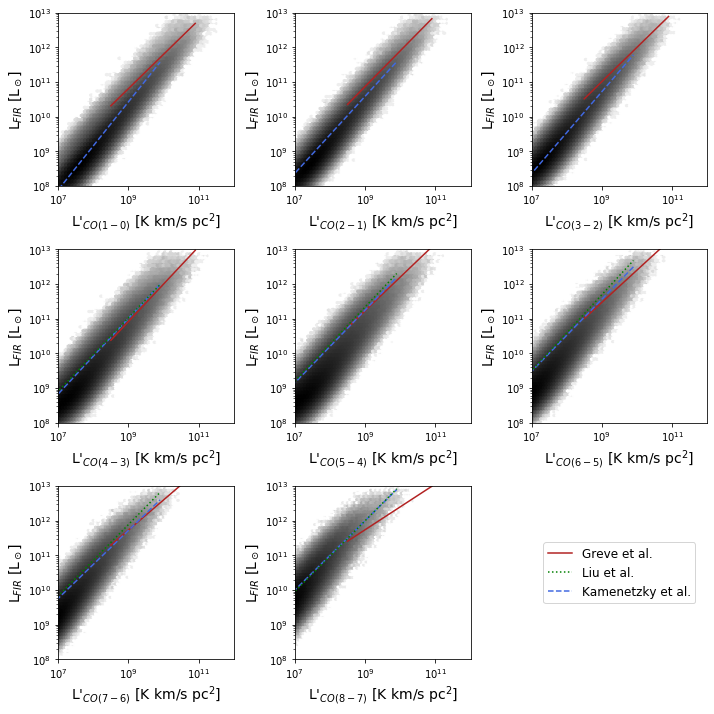

In [27]:
f, axarr = plt.subplots(3,3,figsize = (10,10))

Y = cat['LFIR']

for k in range(0,8):
    
    i = k % 3
    j = int(k / 3)
    
    linename = 'CO({}-{})'.format(k+1,k)
    
    X = cat['LprimCO10'] * cat['ICO{}{}'.format(k+1,k)] \
            / cat['ICO10'] / (k+1)**2

    #Lgrid = 10.**np.arange(0.,20,0.1)

    sel = np.where(X>1.e7)

    axarr[j,i].hexbin(X[sel[0]], Y[sel[0]], gridsize=(50,50),
           xscale = 'log', yscale = 'log', bins = 'log',
           cmap = 'binary')

    G14, = axarr[j,i].plot(Lgrid_G14, 10.**(beta_G14[k] + alpha_G14[k]
                      * np.log10(Lgrid_G14) ), color = 'firebrick')
    
    K16, = axarr[j,i].plot(Lgrid_K16, 10.**(beta_K16[k] + alpha_K16[k]
                      * np.log10(Lgrid_K16) ), color = 'royalblue', linestyle = '--')
    
    if k >= 3:
            L15, = axarr[j,i].plot(Lgrid_L15, 10.**(A_L15[k-3] + N_L15[k-3]
                      * np.log10(Lgrid_L15) ), color = 'green', linestyle = ':')
            
    #if k == 0:
    #        D15, = axarr[j,i].plot(0.74 * Lgrid, 10.**(0.28 + 1.17
    #                  * np.log10(Lgrid) ), color = 'gold', linestyle = '-.')
    
    axarr[j,i].set_xlim([1.e7,1.e12])
    axarr[j,i].set_ylim([1.e8,1.e13])
    
    axarr[j,i].set_xlabel(r"L'$_{"+linename+"}$ [K km/s pc$^2$]", size = 14)
    axarr[j,i].set_ylabel(r"L$_{FIR}$ [L$_\odot$]", size = 14)

axarr[2,2].axis('off')
#axarr[2,2].get_xaxis().set_visible(False)
#axarr[2,2].get_yaxis().set_visible(False)    
axarr[2,2].legend([G14, L15, K16], ['Greve et al.', 'Liu et al.', 'Kamenetzky et al.'],
                  loc = 'center', fontsize = 'large')

f.tight_layout(pad=1.0, h_pad=None, w_pad=None, rect=None)

plt.savefig('LFIR_LCO_SIDES.pdf', dpi = 150)

plt.show()

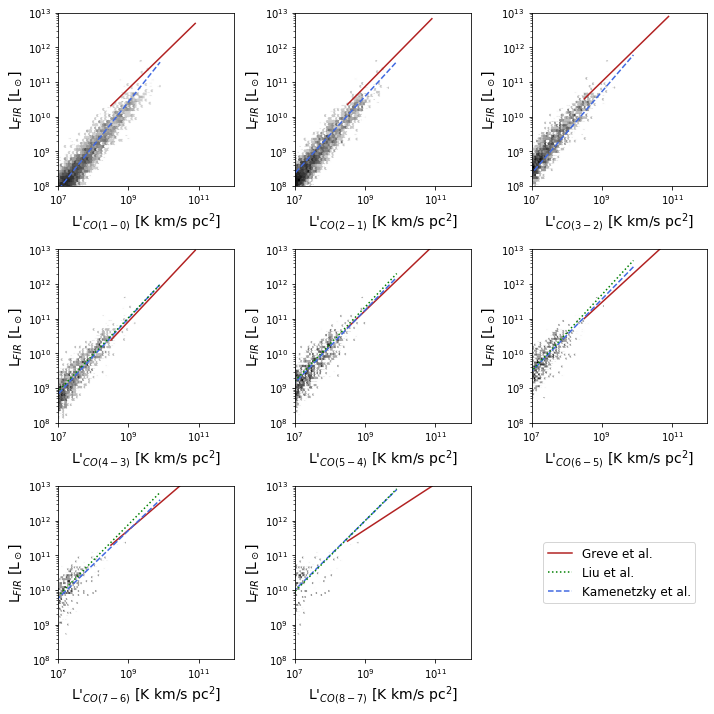

In [28]:
f, axarr = plt.subplots(3,3,figsize = (10,10))

cat_lowz = cat.loc[cat['redshift'] < 0.2].reset_index()

Y = cat_lowz['LFIR']

for k in range(0,8):
    
    i = k % 3
    j = int(k / 3)
    
    linename = 'CO({}-{})'.format(k+1,k)
    
    X = cat_lowz['LprimCO10'] * cat_lowz['ICO{}{}'.format(k+1,k)] \
            / cat_lowz['ICO10'] / (k+1)**2

    #Lgrid = 10.**np.arange(0.,20,0.1)

    sel = np.where(X>1.e7)

    axarr[j,i].hexbin(X[sel[0]], Y[sel[0]], gridsize=(50,50),
           xscale = 'log', yscale = 'log', bins = 'log',
           cmap = 'binary')

    G14, = axarr[j,i].plot(Lgrid_G14, 10.**(beta_G14[k] + alpha_G14[k]
                      * np.log10(Lgrid_G14) ), color = 'firebrick')
    
    K16, = axarr[j,i].plot(Lgrid_K16, 10.**(beta_K16[k] + alpha_K16[k]
                      * np.log10(Lgrid_K16) ), color = 'royalblue', linestyle = '--')
    
    if k >= 3:
            L15, = axarr[j,i].plot(Lgrid_L15, 10.**(A_L15[k-3] + N_L15[k-3]
                      * np.log10(Lgrid_L15) ), color = 'green', linestyle = ':')
            
    #if k == 0:
    #        D15, = axarr[j,i].plot(0.74 * Lgrid, 10.**(0.28 + 1.17
    #                  * np.log10(Lgrid) ), color = 'gold', linestyle = '-.')
    
    axarr[j,i].set_xlim([1.e7,1.e12])
    axarr[j,i].set_ylim([1.e8,1.e13])
    
    axarr[j,i].set_xlabel(r"L'$_{"+linename+"}$ [K km/s pc$^2$]", size = 14)
    axarr[j,i].set_ylabel(r"L$_{FIR}$ [L$_\odot$]", size = 14)

axarr[2,2].axis('off')
#axarr[2,2].get_xaxis().set_visible(False)
#axarr[2,2].get_yaxis().set_visible(False)    
axarr[2,2].legend([G14, L15, K16], ['Greve et al.', 'Liu et al.', 'Kamenetzky et al.'],
                  loc = 'center', fontsize = 'large')

f.tight_layout(pad=1.0, h_pad=None, w_pad=None, rect=None)

plt.savefig('LFIR_LCO_SIDES_zcut.pdf', dpi = 150)

plt.show()